In [1]:
import sys
print(f"Python executable: {sys.executable}")

# 2. Try installing with pip directly referencing the Python executable
!{sys.executable} -m pip install threadpoolctl

# 3. If you're using conda, try installing with conda instead
!conda install -y threadpoolctl

# 4. Check if pip is installing to the correct environment
!pip --version

# 5. As a last resort, try installing scikit-learn which includes threadpoolctl
!pip install -U scikit-learn

Python executable: C:\Users\PC\anaconda3\python.exe
Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
  current version: 23.9.0
  latest version: 25.7.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=25.7.0




pip 23.2.1 from C:\Users\PC\anaconda3\Lib\site-packages\pip (python 3.11)

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/b2/3b/47b5eaee01ef2b5a80ba3f7f6ecf79587cb458690857d4777bfd77371c6f/scikit_learn-1.7.1-cp311-cp311-win_amd64.whl.metadata
  Using cached scikit_learn-1.7.1-cp311-cp311-win_amd64.whl.metadata (11 kB)
Using cached scikit_learn-1.7.1-cp311-cp311-win_amd64.whl (8.9 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.1 which is incompatible.


In [2]:
#!pip install scikit-learn==1.3.2
!pip install seaborn
#!pip install threadpoolctl
!pip install -U imbalanced-learn

  Obtaining dependency information for scikit-learn<2,>=1.3.2 from https://files.pythonhosted.org/packages/a1/a6/c5b78606743a1f28eae8f11973de6613a5ee87366796583fb74c67d54939/scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata
  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata (15 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl (11.1 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.7.1
    Uninstalling scikit-learn-1.7.1:
      Successfully uninstalled scikit-learn-1.7.1


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [4]:
try:
    import threadpoolctl
    print("threadpoolctl imported successfully")
except ImportError as e:
    print(f"Import error: {e}")

threadpoolctl imported successfully


# Load dataset

In [5]:
bookings = pd.read_csv("C:/Users/PC/Downloads/booking.csv")

# Undersatnding the data

In [6]:
bookings.head(10)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled
5,INN00006,1,0,0,2,Meal Plan 2,0,Room_Type 1,346,Offline,0,0,0,100.00,1,9/13/2016,Canceled
6,INN00007,1,1,1,4,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
7,INN00008,3,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
8,INN00009,1,1,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,Online,0,0,0,133.44,3,10/18/2018,Not_Canceled


In [7]:
bookings.tail(10)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
36275,INN36276,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,65.00,0,10/2/2017,Not_Canceled
36276,INN36277,2,0,2,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
36277,INN36278,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,60.00,0,2/28/2018,Canceled
36278,INN36279,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,0,5/20/2018,Canceled
36279,INN36281,2,0,1,1,Not Selected,0,Room_Type 1,48,Online,0,0,0,94.50,0,4/11/2018,Canceled
36280,INN36282,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,9/13/2018,Canceled
36281,INN36283,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
36282,INN36284,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
36283,INN36285,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled
36284,INN36286,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,Online,0,0,0,133.44,3,10/18/2018,Not_Canceled


In [8]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [9]:
bookings.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [10]:
bookings.shape

(36285, 17)

In [11]:
bookings.duplicated().sum()

0

In [12]:
bookings.isnull().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

# Check for outliers

In [13]:
numeric_features= bookings.select_dtypes(include='number')

In [14]:
len(numeric_features.columns)

11

<function matplotlib.pyplot.show(close=None, block=None)>

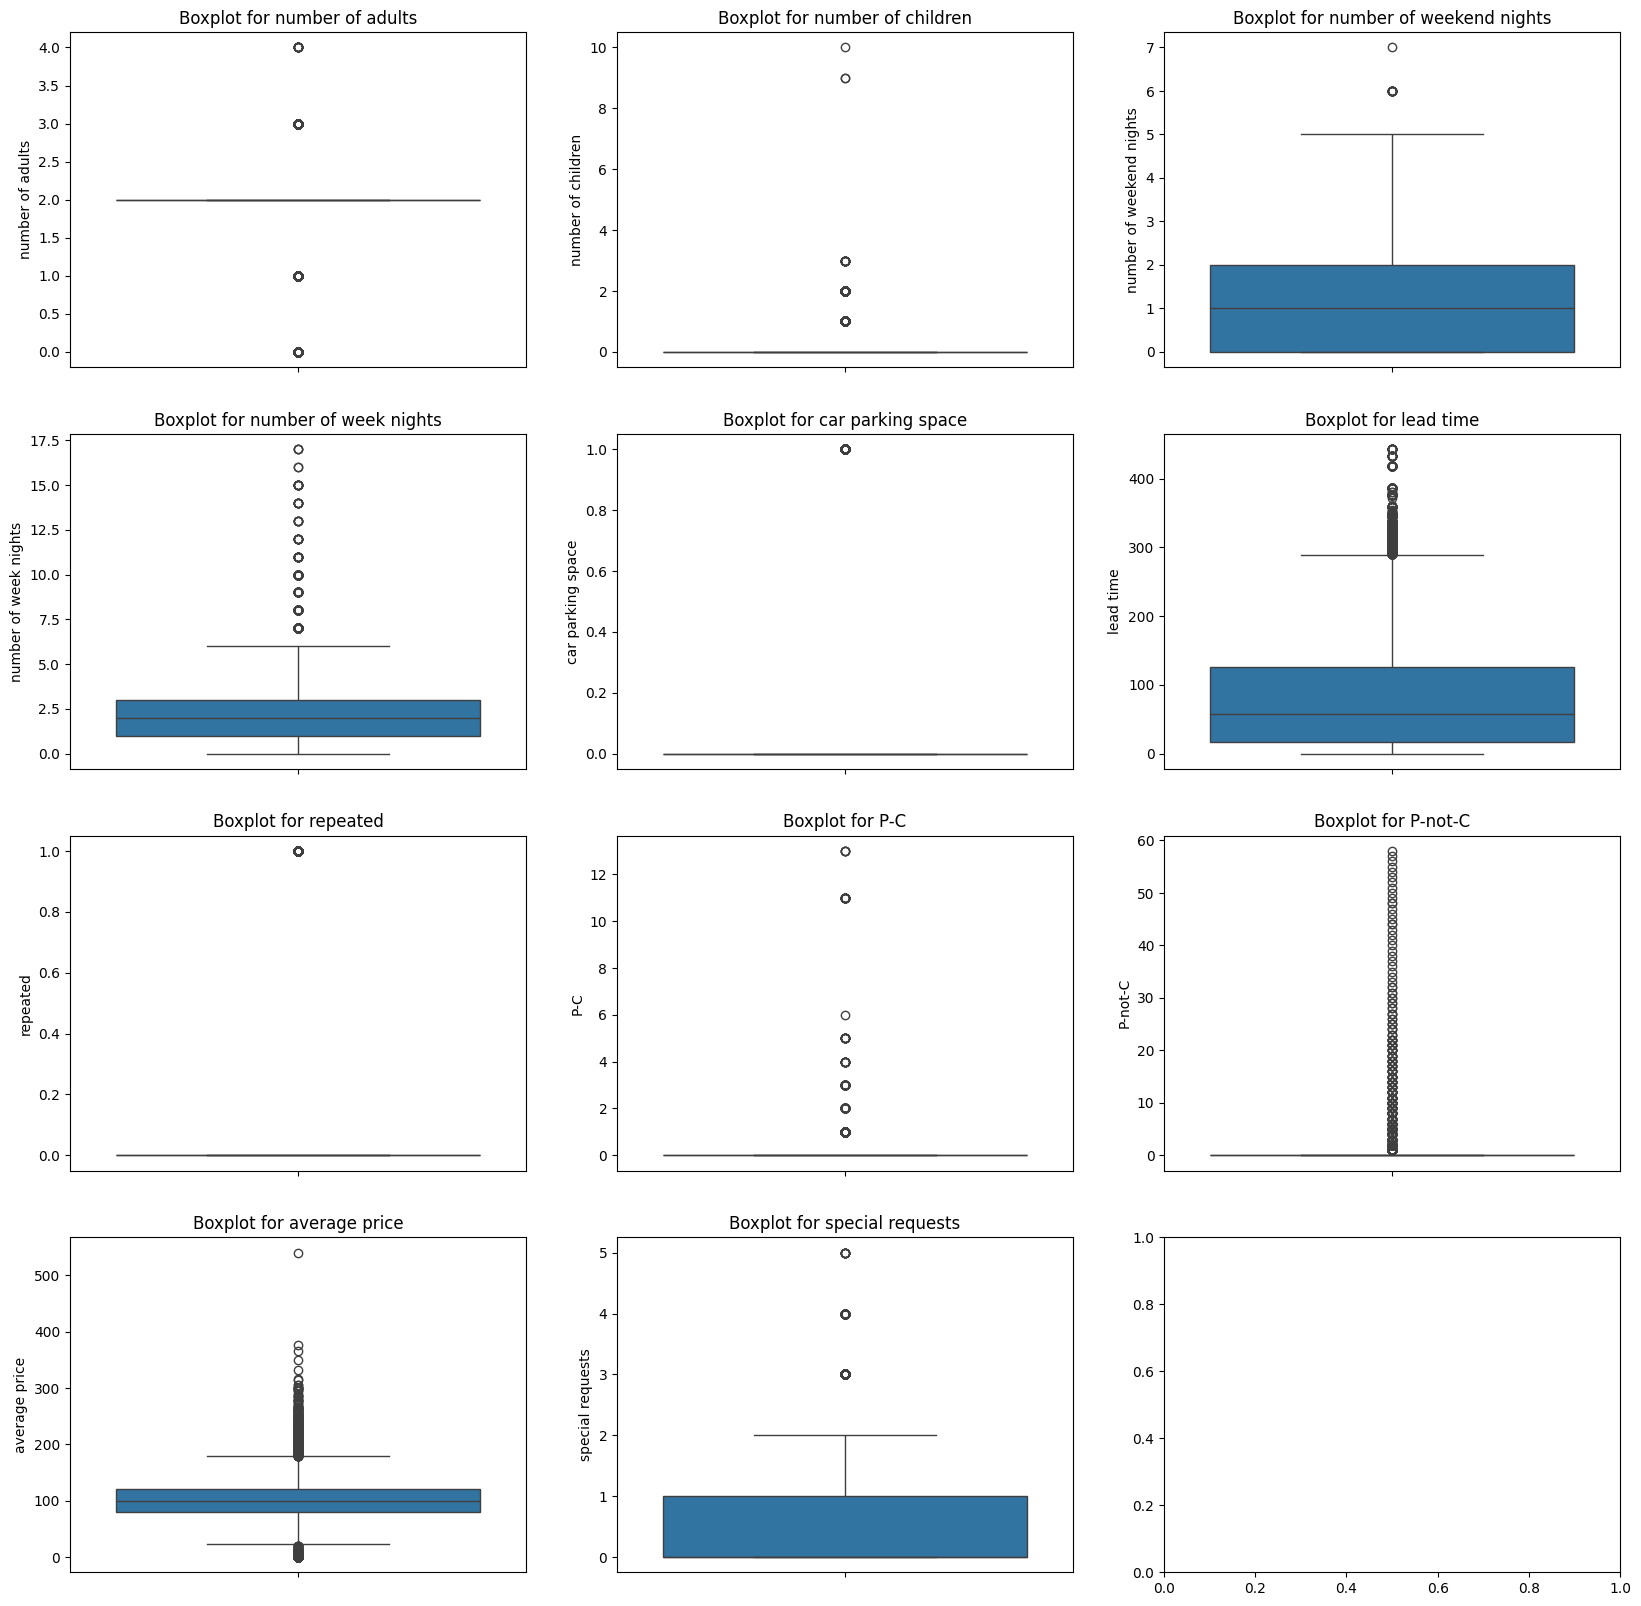

In [15]:
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(20,20))
ax=ax.flatten()
for idx, col in enumerate(numeric_features):
    sns.boxplot(bookings[col], ax=ax[idx])
    ax[idx].set_title(f"Boxplot for {col}")
plt.show

# Drop outliers

In [16]:
affected_columns = ['number of week nights', 'lead time', 'special requests', 'number of weekend nights', 'average price']

In [17]:
Q1 = bookings[affected_columns].quantile(0.25)
Q3 = bookings[affected_columns].quantile(0.75)

In [18]:
IQR = Q3 - Q1

In [19]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [20]:
bookings[affected_columns] = bookings[affected_columns].clip(lower=lower_bound, upper=upper_bound, axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

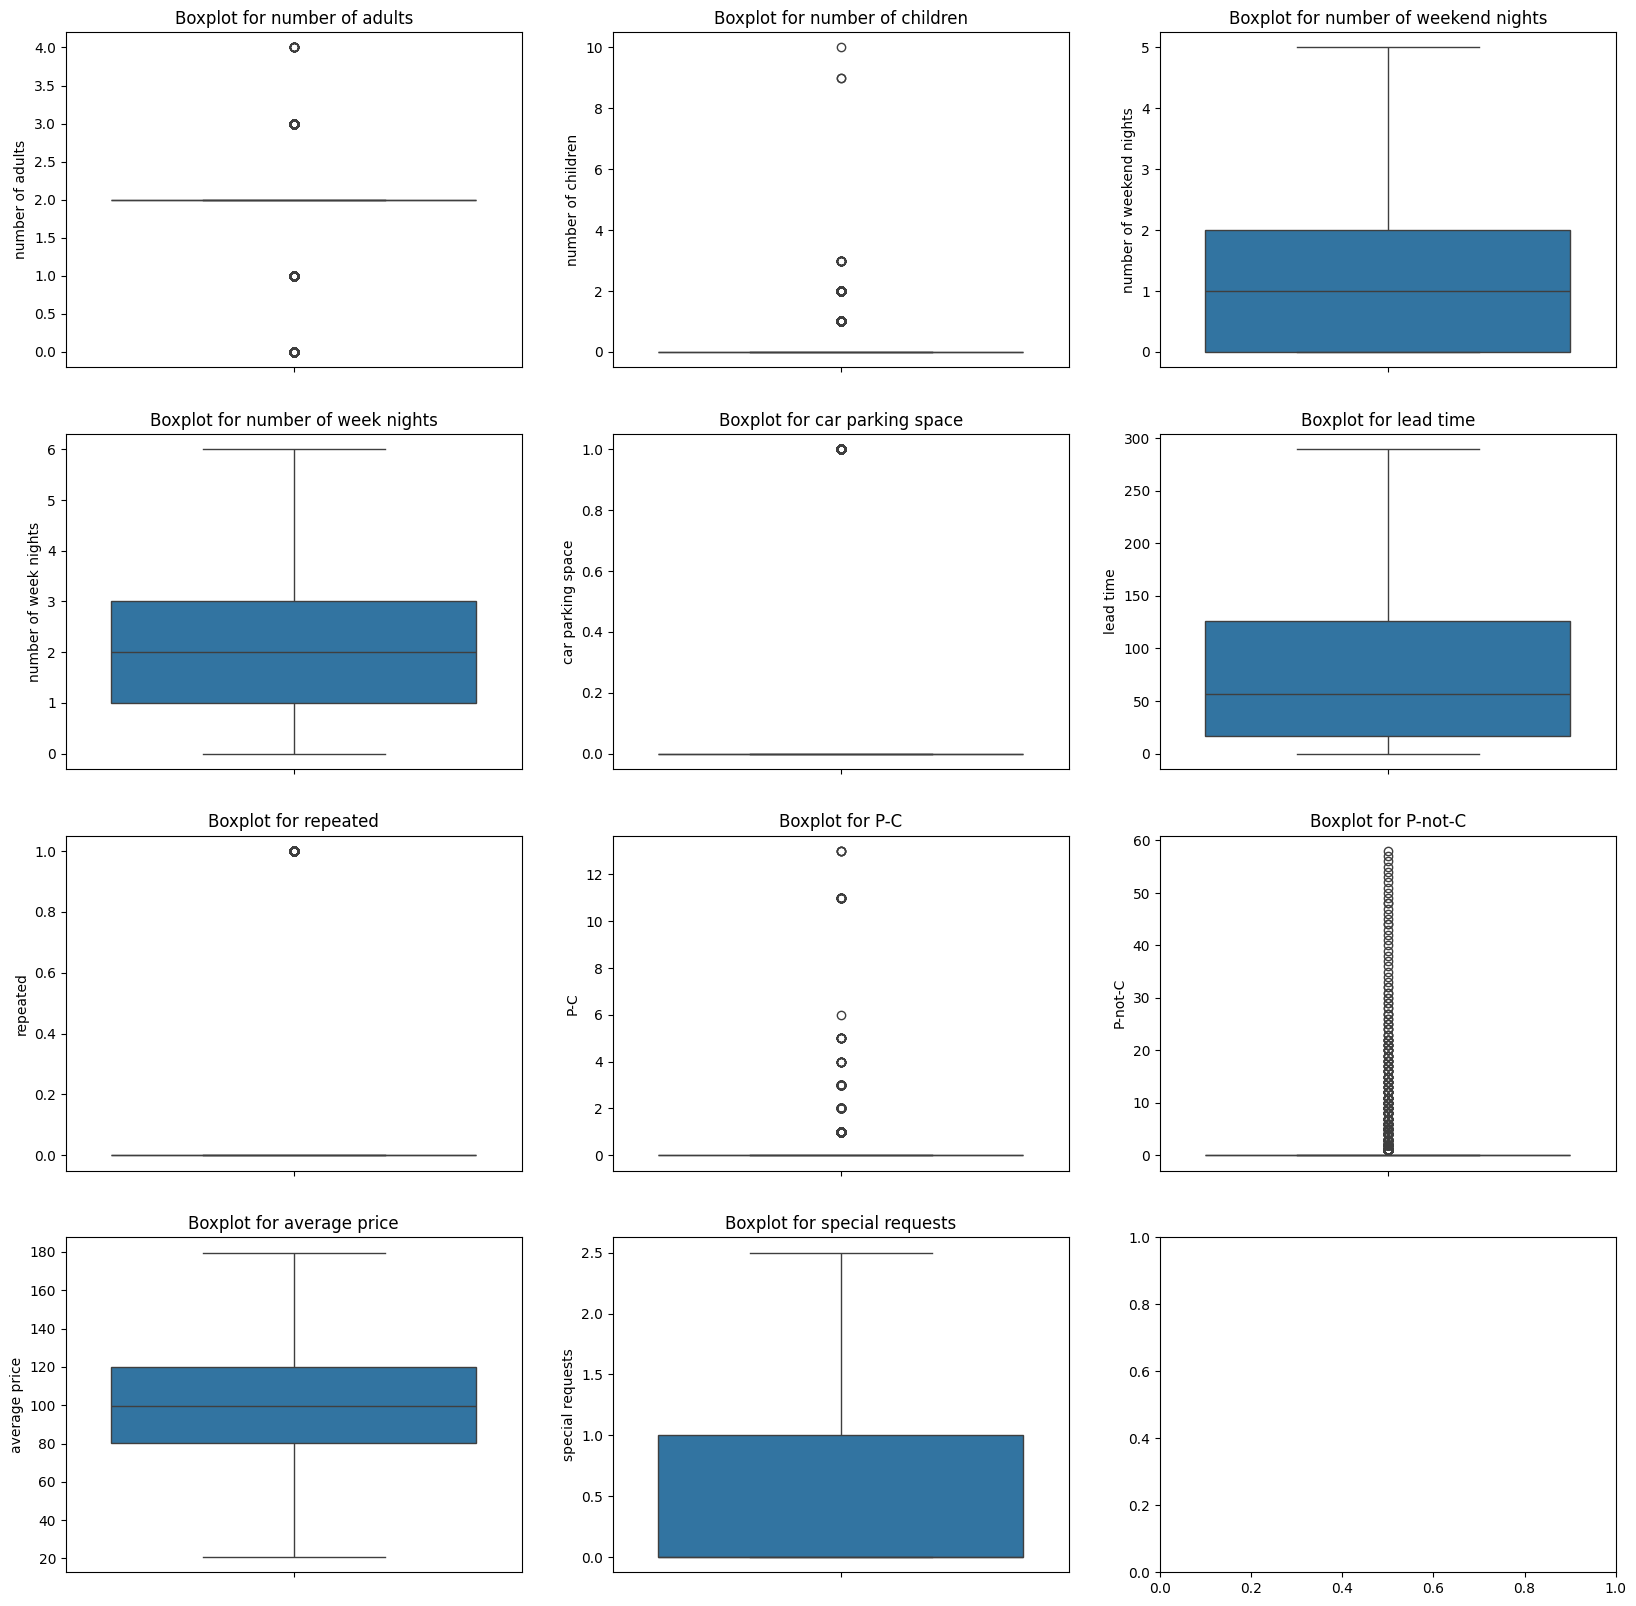

In [21]:
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(20,20))
ax=ax.flatten()
for idx, col in enumerate(numeric_features):
    sns.boxplot(bookings[col], ax=ax[idx])
    ax[idx].set_title(f"Boxplot for {col}")
plt.show

# Checking for class imbalance

In [22]:
bookings['booking status'].value_counts()

booking status
Not_Canceled    24396
Canceled        11889
Name: count, dtype: int64

# Feature engineering

In [23]:
bookings['reservation_date'] = pd.to_datetime(bookings['date of reservation'], errors='coerce')

In [24]:
bookings['stay_duration'] = bookings['number of weekend nights'] + bookings['number of week nights']

In [25]:
bookings.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status,reservation_date,stay_duration
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224.0,Offline,0,0,0,88.00,0.0,10/2/2015,Not_Canceled,2015-10-02,7
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5.0,Online,0,0,0,106.68,1.0,11/6/2018,Not_Canceled,2018-11-06,4
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1.0,Online,0,0,0,50.00,0.0,2/28/2018,Canceled,2018-02-28,4
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211.0,Online,0,0,0,100.00,1.0,5/20/2017,Canceled,2017-05-20,2
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48.0,Online,0,0,0,77.00,0.0,4/11/2018,Canceled,2018-04-11,3


In [26]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Booking_ID                36285 non-null  object        
 1   number of adults          36285 non-null  int64         
 2   number of children        36285 non-null  int64         
 3   number of weekend nights  36285 non-null  int64         
 4   number of week nights     36285 non-null  int64         
 5   type of meal              36285 non-null  object        
 6   car parking space         36285 non-null  int64         
 7   room type                 36285 non-null  object        
 8   lead time                 36285 non-null  float64       
 9   market segment type       36285 non-null  object        
 10  repeated                  36285 non-null  int64         
 11  P-C                       36285 non-null  int64         
 12  P-not-C           

DROPPING INVALID DATES

In [27]:
invalid_dates = bookings[bookings['reservation_date'].isna()]
invalid_samples = invalid_dates['date of reservation'].unique()
print(invalid_samples[:10])

['2018-2-29']


In [28]:
bookings = bookings[bookings['reservation_date'].notna()]

In [29]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36248 entries, 0 to 36284
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Booking_ID                36248 non-null  object        
 1   number of adults          36248 non-null  int64         
 2   number of children        36248 non-null  int64         
 3   number of weekend nights  36248 non-null  int64         
 4   number of week nights     36248 non-null  int64         
 5   type of meal              36248 non-null  object        
 6   car parking space         36248 non-null  int64         
 7   room type                 36248 non-null  object        
 8   lead time                 36248 non-null  float64       
 9   market segment type       36248 non-null  object        
 10  repeated                  36248 non-null  int64         
 11  P-C                       36248 non-null  int64         
 12  P-not-C                

In [30]:
bookings['reservation_year'] = bookings['reservation_date'].dt.year
bookings['reservation_month'] = bookings['reservation_date'].dt.month
bookings['reservation_day'] = bookings['reservation_date'].dt.day
bookings['reservation_dayofweek'] = bookings['reservation_date'].dt.dayofweek

In [31]:
bookings['day_category'] = bookings['reservation_dayofweek'].apply(
    lambda x: 'Weekend' if x >= 5 else 'Weekday'
)

In [32]:
def season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

# Apply the function to the 'month' column
bookings['season'] = bookings['reservation_month'].apply(season)

In [33]:
#bookings['total_guests'] = bookings['number of adults'] + bookings['number of children']

In [34]:
bookings = bookings.drop(columns=['Booking_ID', 'P-C', 'P-not-C', 'reservation_day', 'reservation_dayofweek', 'reservation_date', 'date of reservation', 'reservation_month',  'number of weekend nights', 'number of week nights'])

In [35]:
bookings.columns

Index(['number of adults', 'number of children', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'average price', 'special requests', 'booking status',
       'stay_duration', 'reservation_year', 'day_category', 'season'],
      dtype='object')

In [36]:
bookings.rename(columns={'type of meal': 'type_of_meal', 'car parking space': 'car_parking_space', 'number of adults': 'number_of_adults', 'number of children': 'number_of_children',
       'room type':'room_type', 'lead time':'lead_time', 'market segment type': 'market_segment_type',
       'average price': 'average_price', 'special requests': 'special_requests', 'booking status': 'booking_status'}, inplace=True)

In [37]:
bookings.head()

,number_of_adults,number_of_children,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,average_price,special_requests,booking_status,stay_duration,reservation_year,day_category,season
0,1,1,Meal Plan 1,0,Room_Type 1,224.0,Offline,0,88.00,0.0,Not_Canceled,7,2015,Weekday,Fall
1,1,0,Not Selected,0,Room_Type 1,5.0,Online,0,106.68,1.0,Not_Canceled,4,2018,Weekday,Fall
2,2,1,Meal Plan 1,0,Room_Type 1,1.0,Online,0,50.00,0.0,Canceled,4,2018,Weekday,Winter
3,1,0,Meal Plan 1,0,Room_Type 1,211.0,Online,0,100.00,1.0,Canceled,2,2017,Weekend,Spring
4,1,0,Not Selected,0,Room_Type 1,48.0,Online,0,77.00,0.0,Canceled,3,2018,Weekday,Spring


In [38]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36248 entries, 0 to 36284
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   number_of_adults     36248 non-null  int64  
 1   number_of_children   36248 non-null  int64  
 2   type_of_meal         36248 non-null  object 
 3   car_parking_space    36248 non-null  int64  
 4   room_type            36248 non-null  object 
 5   lead_time            36248 non-null  float64
 6   market_segment_type  36248 non-null  object 
 7   repeated             36248 non-null  int64  
 8   average_price        36248 non-null  float64
 9   special_requests     36248 non-null  float64
 10  booking_status       36248 non-null  object 
 11  stay_duration        36248 non-null  int64  
 12  reservation_year     36248 non-null  int32  
 13  day_category         36248 non-null  object 
 14  season               36248 non-null  object 
dtypes: float64(3), int32(1), int64(5), object

EXPLORATORY DATA ANALYSIS

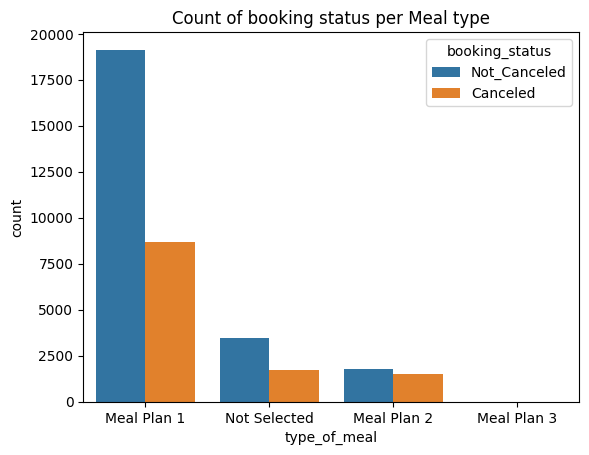

In [39]:
sns.countplot(x='type_of_meal', hue='booking_status', data=bookings)
plt.title('Count of booking status per Meal type')
plt.show()

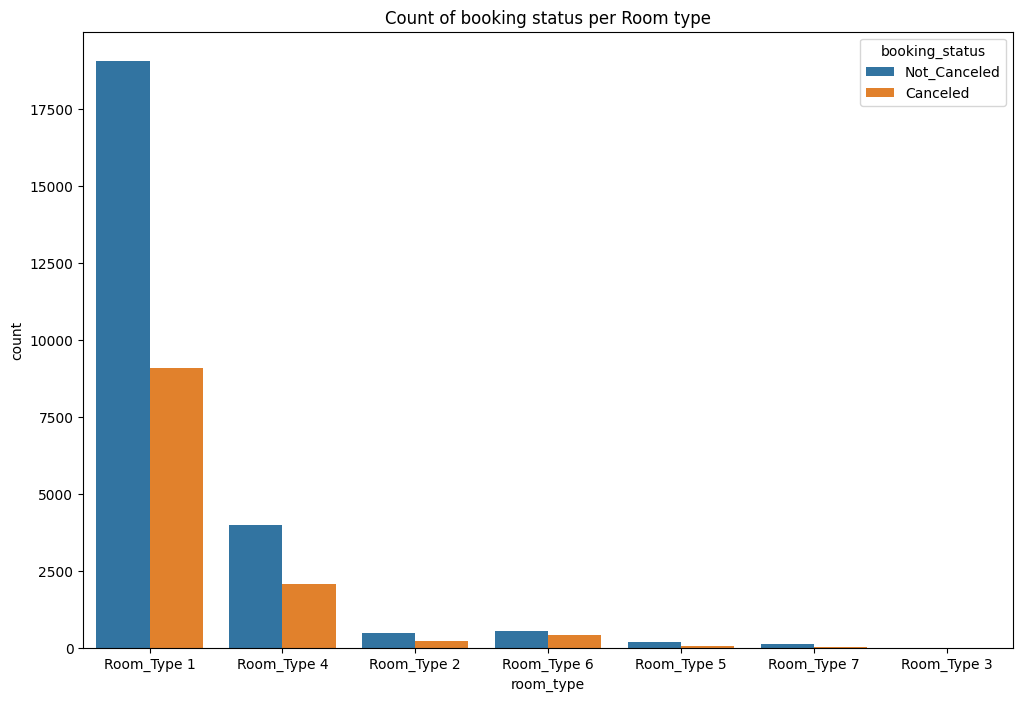

In [40]:
plt.figure(figsize= (12,8))
sns.countplot(x='room_type', hue='booking_status', data=bookings)
plt.title('Count of booking status per Room type')
plt.show()

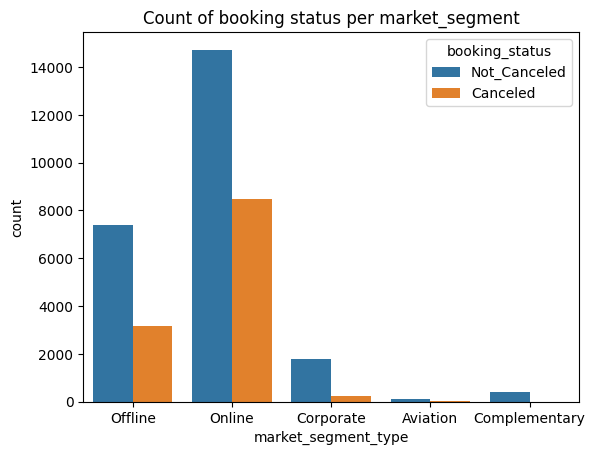

In [41]:
sns.countplot(x='market_segment_type', hue='booking_status', data=bookings)
plt.title('Count of booking status per market_segment')
plt.show()

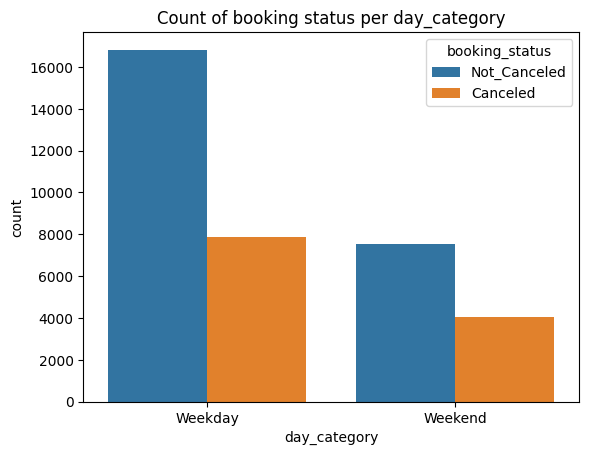

In [42]:
sns.countplot(x='day_category', hue='booking_status', data=bookings)
plt.title('Count of booking status per day_category')
plt.show()

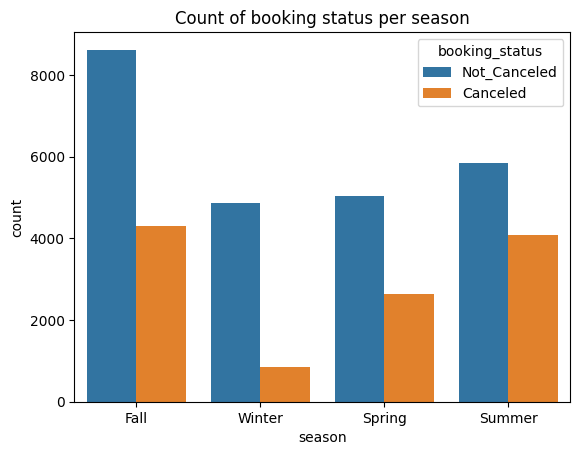

In [43]:
sns.countplot(x='season', hue='booking_status', data=bookings)
plt.title('Count of booking status per season')
plt.show()

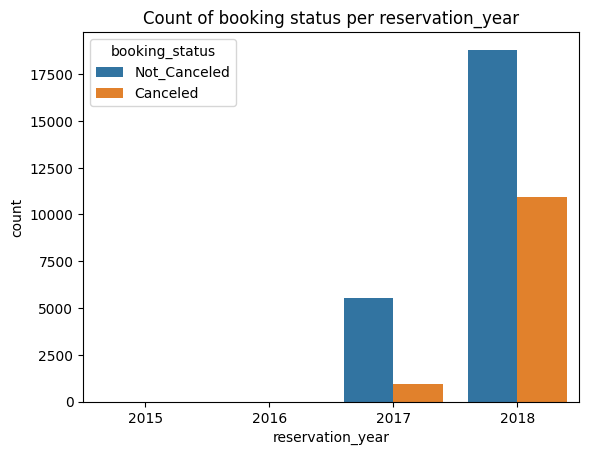

In [44]:
sns.countplot(x='reservation_year', hue='booking_status', data=bookings)
plt.title('Count of booking status per reservation_year')
plt.show()

# Encode categorical features

In [45]:
!pip install scikit-learn

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
encoder = LabelEncoder()

In [48]:
bookings['type_of_meal']= encoder.fit_transform(bookings['type_of_meal'])
bookings['room_type']= encoder.fit_transform(bookings['room_type'])
bookings['market_segment_type']= encoder.fit_transform(bookings['market_segment_type'])
bookings['day_category']= encoder.fit_transform(bookings['day_category'])
bookings['booking_status']= encoder.fit_transform(bookings['booking_status'])
bookings['season']= encoder.fit_transform(bookings['season'])

In [49]:
bookings.head(10)

,number_of_adults,number_of_children,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,average_price,special_requests,booking_status,stay_duration,reservation_year,day_category,season
0,1,1,0,0,0,224.0,3,0,88.00,0.0,1,7,2015,0,0
1,1,0,3,0,0,5.0,4,0,106.68,1.0,1,4,2018,0,0
2,2,1,0,0,0,1.0,4,0,50.00,0.0,0,4,2018,0,3
3,1,0,0,0,0,211.0,4,0,100.00,1.0,0,2,2017,1,1
4,1,0,3,0,0,48.0,4,0,77.00,0.0,0,3,2018,0,1
5,1,0,1,0,0,289.5,3,0,100.00,1.0,0,2,2016,0,0
6,1,1,0,0,0,34.0,4,0,107.55,1.0,1,5,2017,1,0
7,3,0,0,0,3,83.0,4,0,105.61,1.0,1,4,2018,0,3
8,1,1,0,0,0,121.0,3,0,96.90,1.0,1,4,2018,0,2
9,2,0,0,0,3,44.0,4,0,133.44,2.5,1,5,2018,0,0


In [50]:
bookings.shape

(36248, 15)

Scaling numerical features

In [51]:
cols_to_scale = ['lead_time', 'average_price', 'reservation_year', 'car_parking_space', 'repeated', 'special_requests', 'stay_duration', 'number_of_adults', 'number_of_children']

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()

In [54]:
bookings[cols_to_scale] = scaler.fit_transform(bookings[cols_to_scale])

In [55]:
bookings.head()

,number_of_adults,number_of_children,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,average_price,special_requests,booking_status,stay_duration,reservation_year,day_category,season
0,-1.629530,2.222348,0,-0.178641,0,1.716319,3,-0.161913,-0.473024,-0.812403,1,2.448758,-7.336542,0,0
1,-1.629530,-0.261562,3,-0.178641,0,-0.964834,4,-0.161913,0.116760,0.526142,1,0.617733,0.468012,0,0
2,0.298503,2.222348,0,-0.178641,0,-1.013805,4,-0.161913,-1.672798,-0.812403,0,0.617733,0.468012,0,3
3,-1.629530,-0.261562,0,-0.178641,0,1.557164,4,-0.161913,-0.094148,0.526142,0,-0.602950,-2.133506,1,1
4,-1.629530,-0.261562,3,-0.178641,0,-0.438398,4,-0.161913,-0.820327,-0.812403,0,0.007392,0.468012,0,1


Separating the features

In [56]:
X = bookings.drop('booking_status', axis=1)
y = bookings['booking_status']

In [57]:
smote = SMOTE(random_state=42)

In [58]:
X_resampled, y_resampled = smote.fit_resample(X, y)

In [59]:
y_resampled.value_counts()

booking_status
1    24366
0    24366
Name: count, dtype: int64

In [60]:
bookings.to_csv('bookings_balanced_data.csv', index=False)

Splitting the dataset

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

TRAINING AND EVALUATING THE MODELS

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
LR_model = LogisticRegression(random_state=42)

In [65]:
LR_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [66]:
y_pred = LR_model.predict(X_test)

In [67]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [68]:
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [69]:
print(report)

              precision    recall  f1-score   support

           0       0.78      0.77      0.78      4823
           1       0.78      0.79      0.79      4924

    accuracy                           0.78      9747
   macro avg       0.78      0.78      0.78      9747
weighted avg       0.78      0.78      0.78      9747



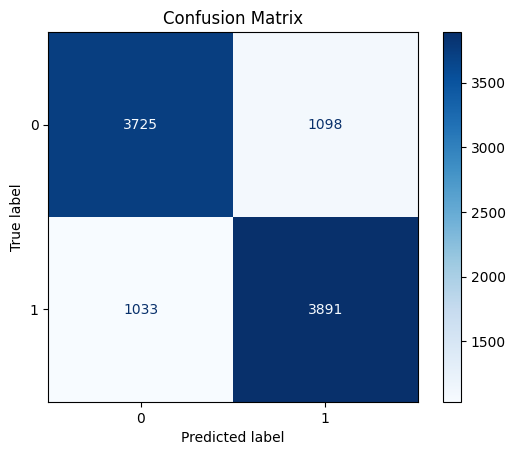

In [70]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [71]:
ytrain_pred = LR_model.predict(X_train)

In [72]:
report = classification_report(y_train, ytrain_pred)

In [73]:
print(report)

              precision    recall  f1-score   support

           0       0.78      0.77      0.78     19543
           1       0.77      0.78      0.78     19442

    accuracy                           0.78     38985
   macro avg       0.78      0.78      0.78     38985
weighted avg       0.78      0.78      0.78     38985



In [74]:
from sklearn.ensemble import RandomForestClassifier
!pip install xgboost
from xgboost import XGBClassifier

RANDOMFOREST MODEL

In [75]:
RFC_model = RandomForestClassifier(random_state=42)

In [76]:
RFC_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [77]:
y_pred = RFC_model.predict(X_test)

In [78]:
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [79]:
print(report)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      4823
           1       0.91      0.92      0.91      4924

    accuracy                           0.91      9747
   macro avg       0.91      0.91      0.91      9747
weighted avg       0.91      0.91      0.91      9747



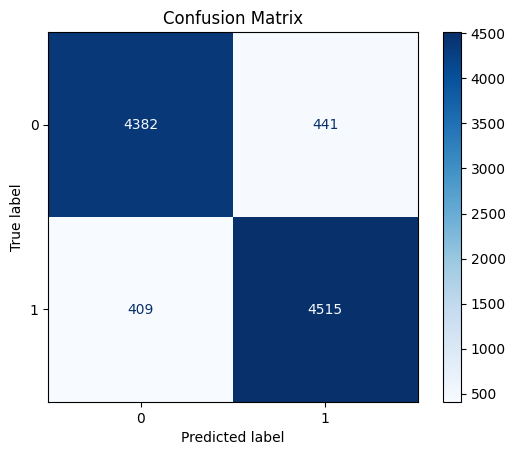

In [80]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [81]:
ytrain_pred = RFC_model.predict(X_train)

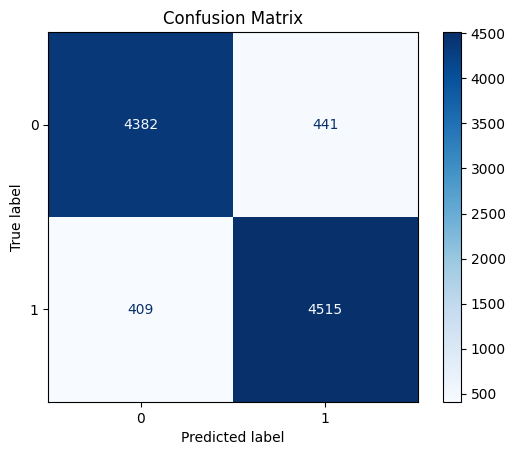

In [82]:
report = classification_report(y_train, ytrain_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RFC_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [83]:
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19543
           1       0.99      0.99      0.99     19442

    accuracy                           0.99     38985
   macro avg       0.99      0.99      0.99     38985
weighted avg       0.99      0.99      0.99     38985



In [84]:
cm = confusion_matrix(y_train, ytrain_pred)

In [85]:
!pip install -q shap
import shap
shap.initjs()

C:\Users\PC\anaconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [86]:
explainer = shap.TreeExplainer(RFC_model)

In [87]:
# Take a manageable sample from X_test (e.g. 5000 rows)
X_sample = X_test.sample(5000, random_state=42)

# Get SHAP values
shap_values = explainer(X_sample, check_additivity=False)

In [88]:
print(type(shap_values))
print(np.array(shap_values).shape)

<class 'shap._explanation.Explanation'>
(5000, 14, 2)


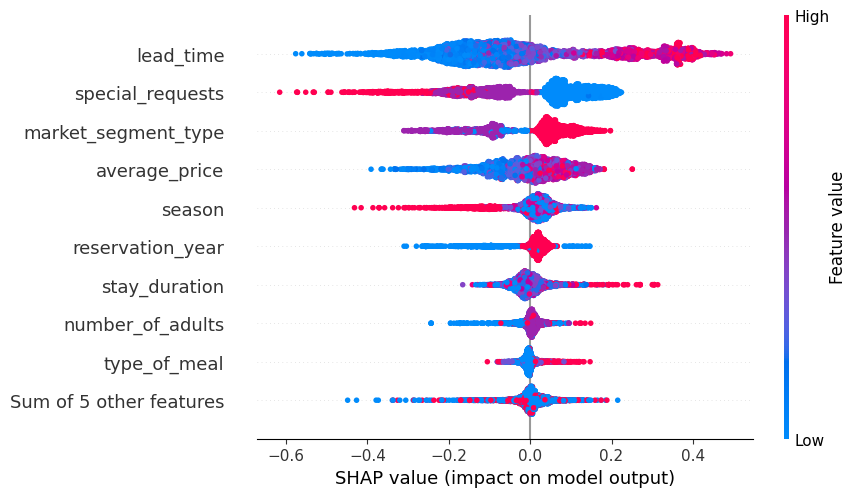

In [89]:
shap.plots.beeswarm(shap_values[..., 0])

In [90]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [91]:
y_probs = RFC_model.predict_proba(X_test)[:, 1]

In [92]:
fpr, tpr, _ = roc_curve(y_test, y_probs)
auc_score = auc(fpr, tpr)

Text(0.5, 1.0, 'ROC Curve')

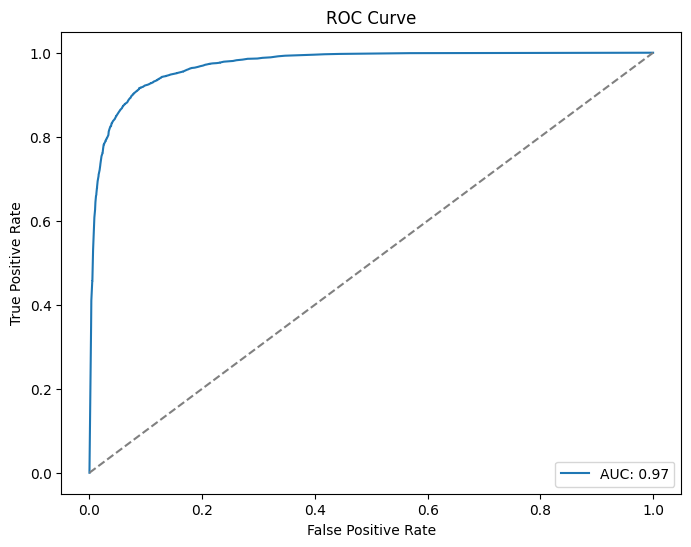

In [93]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC: {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.title("ROC Curve")

FEATURE SELECTION

In [94]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

In [95]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [96]:
selector = RFECV(estimator=RFC_model, step=1, cv=cv, scoring='accuracy')  # or 'roc_auc', 'f1' etc.
selector.fit(X_train, y_train)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
      estimator=RandomForestClassifier(random_state=42), scoring='accuracy')

In [97]:
print("Optimal number of features:", selector.n_features_)
print("Selected features:", X_train.columns[selector.support_])

Optimal number of features: 14
Selected features: Index(['number_of_adults', 'number_of_children', 'type_of_meal',
       'car_parking_space', 'room_type', 'lead_time', 'market_segment_type',
       'repeated', 'average_price', 'special_requests', 'stay_duration',
       'reservation_year', 'day_category', 'season'],
      dtype='object')


FEATURE IMPORTANCE

In [98]:
selected_features = RFC_model.feature_names_in_

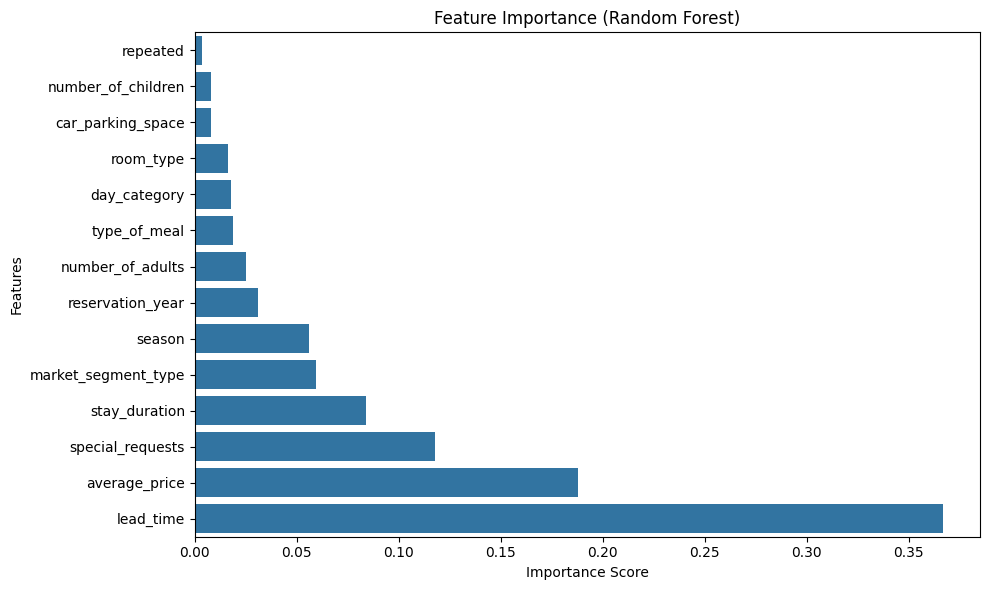

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = RFC_model.feature_importances_
feat_imp = pd.Series(importances, index=selected_features).sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


FEATURE CORRELATION

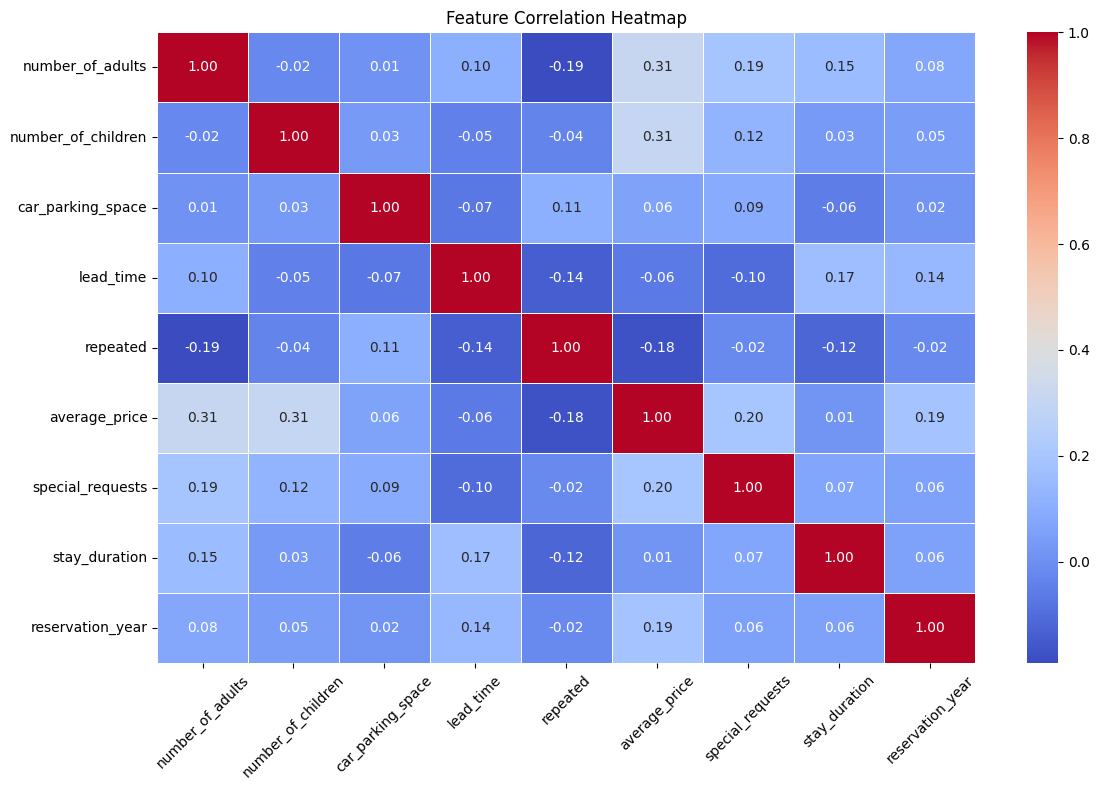

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have a DataFrame called 'df'
# If you only want to check correlation for numeric features:
numeric_df = bookings.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Set plot size
plt.figure(figsize=(12, 8))

# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


FEATURE VS TARGET CORRELATION

C:\Users\PC\AppData\Local\Temp\ipykernel_20760\3077319334.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.values, y=target_corr.index, palette="viridis")


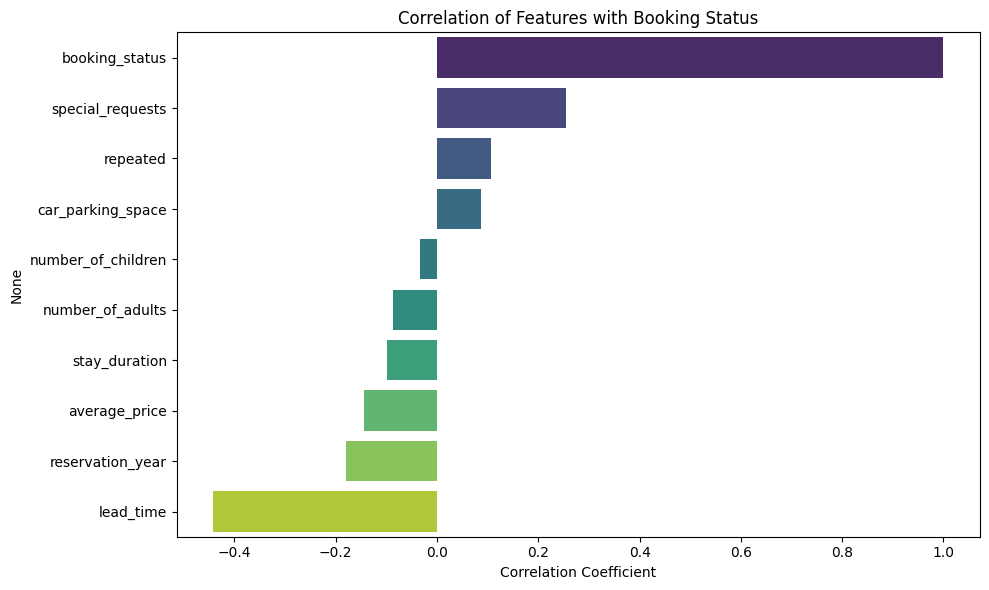

In [101]:
# Add target variable to your numeric_df if not already there
numeric_df['booking_status'] = bookings['booking_status']

# Compute correlations with target
target_corr = numeric_df.corr()['booking_status'].sort_values(ascending=False)

# Display as bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr.values, y=target_corr.index, palette="viridis")
plt.title('Correlation of Features with Booking Status')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()


HYPERPARAMETER TUNING FOR THE RANDOMFOREST MODEL AND EVALUATION OF THE BEST MODEL

In [102]:
from sklearn.model_selection import GridSearchCV

In [103]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [104]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [105]:
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',  
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=2)

In [106]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [107]:
best_rf = grid_search.best_estimator_

# Predict on test data
y_pred = best_rf.predict(X_test)

# Print performance
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91      4823
           1       0.91      0.92      0.91      4924

    accuracy                           0.91      9747
   macro avg       0.91      0.91      0.91      9747
weighted avg       0.91      0.91      0.91      9747



In [108]:
best_rf = grid_search.best_estimator_

# Predict on test data
y_pred = best_rf.predict(X_train)

# Print performance
print("Classification Report:\n", classification_report(y_train, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     19543
           1       0.99      0.99      0.99     19442

    accuracy                           0.99     38985
   macro avg       0.99      0.99      0.99     38985
weighted avg       0.99      0.99      0.99     38985



XGBOOST MODEL

In [109]:
XGB_model = XGBClassifier(random_state=42)

In [110]:
XGB_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [111]:
y_pred = XGB_model.predict(X_train)

# Print performance
print("Classification Report:\n", classification_report(y_train, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91     19543
           1       0.91      0.92      0.91     19442

    accuracy                           0.91     38985
   macro avg       0.91      0.91      0.91     38985
weighted avg       0.91      0.91      0.91     38985



In [112]:
y_pred = XGB_model.predict(X_test)

# Print performance
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      4823
           1       0.88      0.90      0.89      4924

    accuracy                           0.89      9747
   macro avg       0.89      0.89      0.89      9747
weighted avg       0.89      0.89      0.89      9747



In [113]:
cm = confusion_matrix(y_test, y_pred)

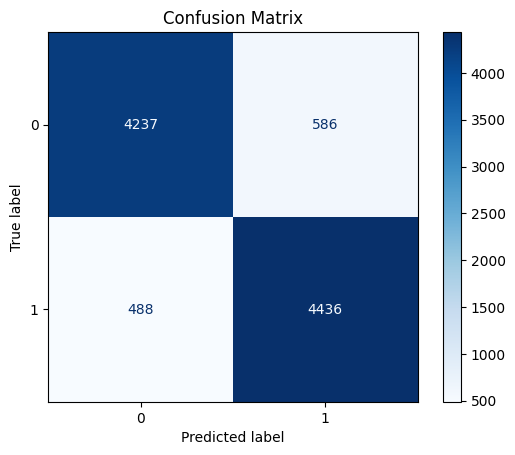

In [114]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=XGB_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [115]:
explainer = shap.TreeExplainer(XGB_model)

In [116]:
#X_sample = X_test.sample(5000, random_state=42)

# Get SHAP values
shap_values = explainer(X_test, check_additivity=False)

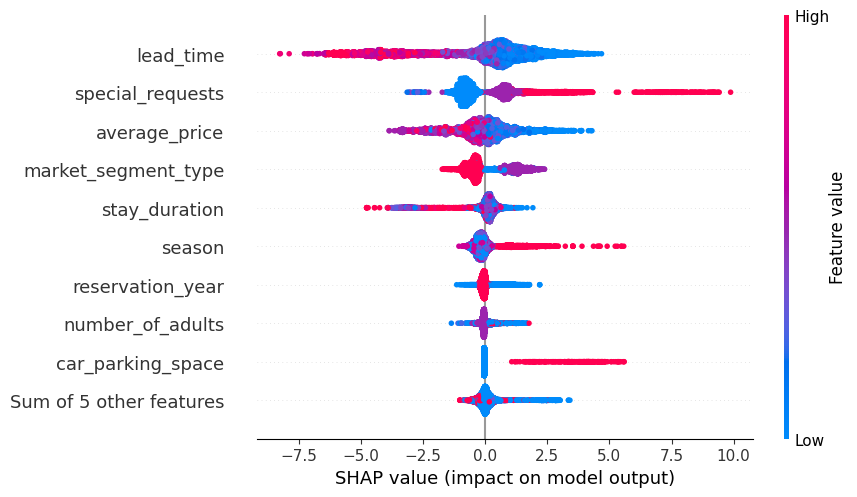

In [117]:
shap.plots.beeswarm(shap_values)

In [118]:
from sklearn.metrics import accuracy_score

HYPERPARAMETER TUNING FOR THE XGBOOST MODEL AND EVALUATION OF THE BEST MODEL

In [119]:
param_grid = {
    'gamma': [0, 0.1, 0.3, 0.5]
}

grid = GridSearchCV(estimator=XGB_model,
                    param_grid=param_grid, scoring='accuracy', cv=3, verbose=1)
grid.fit(X_train, y_train)

print("Best gamma:", grid.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best gamma: {'gamma': 0.1}


In [120]:
final_model = grid.best_estimator_
y_pred_final = final_model.predict(X_test)

print("Final Accuracy:", accuracy_score(y_test, y_pred_final))
print(classification_report(y_test, y_pred_final))

Final Accuracy: 0.8942238637529496
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4823
           1       0.89      0.90      0.90      4924

    accuracy                           0.89      9747
   macro avg       0.89      0.89      0.89      9747
weighted avg       0.89      0.89      0.89      9747



In [121]:
y_pred = final_model.predict(X_train)

# Print performance
print("Classification Report:\n", classification_report(y_train, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91     19543
           1       0.91      0.92      0.91     19442

    accuracy                           0.91     38985
   macro avg       0.91      0.91      0.91     38985
weighted avg       0.91      0.91      0.91     38985



In [122]:
cm = confusion_matrix(y_test, y_pred_final)

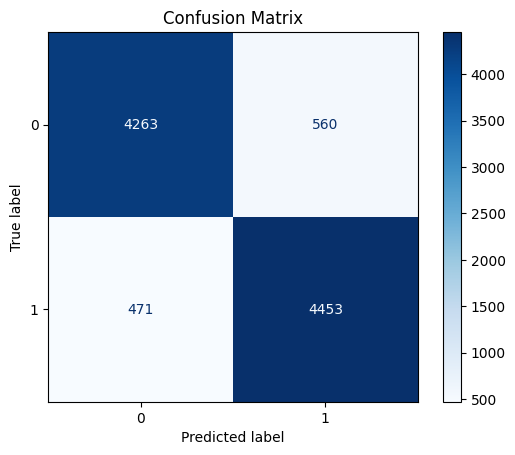

In [123]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [124]:
explainer = shap.TreeExplainer(final_model)

In [125]:
shap_values = explainer(X_test, check_additivity=False)

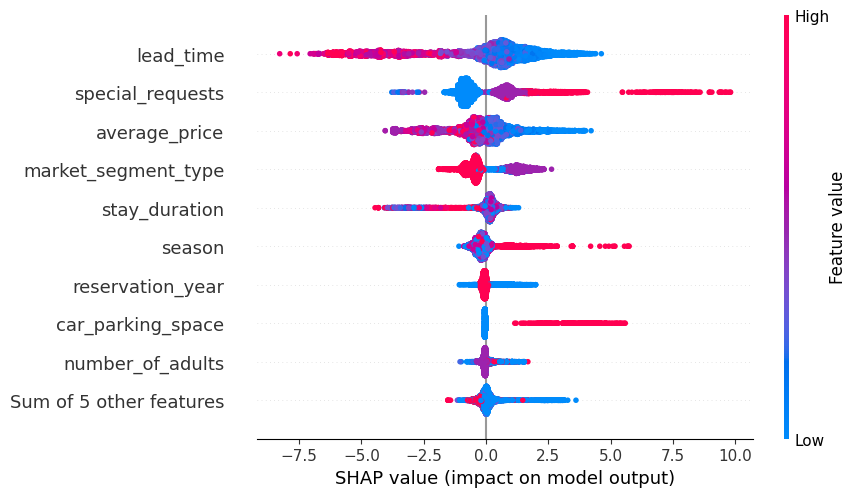

In [126]:
shap.plots.beeswarm(shap_values)

In [127]:
y_probs = final_model.predict_proba(X_test)[:, 1]

In [128]:
fpr, tpr, threshold = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

In [129]:
fpr, tpr, _ = roc_curve(y_test, y_probs)
auc_score = auc(fpr, tpr)

Text(0.5, 1.0, 'ROC Curve')

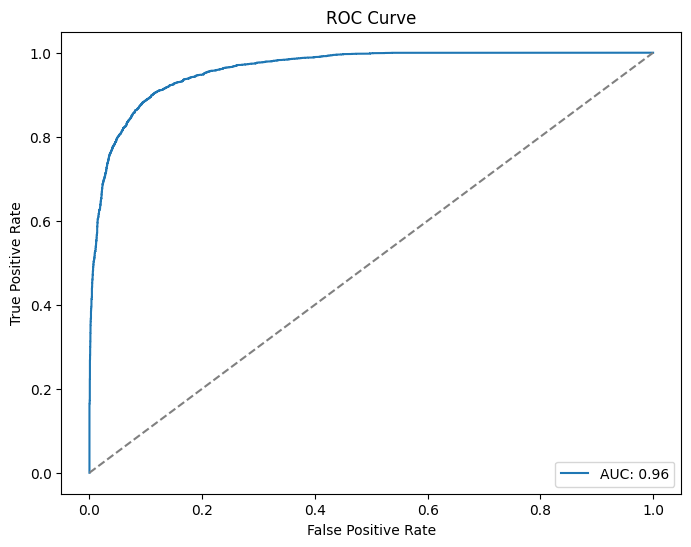

In [130]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC: {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.title("ROC Curve")